https://github.com/lukelbd/proplot/issues/78

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
season_clim_diff = xr.open_dataarray('season_clim_diff.nc')
season_clim_diff

<xarray.DataArray (season: 4, lat: 143, lon: 144)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * lat                   (lat) float32 -90.0 -88.73239 ... 88.73239 90.0
  * lon                   (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * season                (season) object 'DJF' 'JJA' 'MAM' 'SON'
    snow_cover_threshold  float32 ...

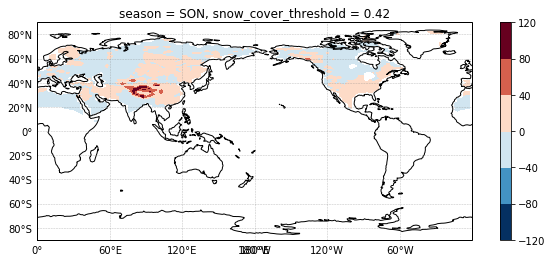

In [3]:
season = "SON"
plt.figure(figsize=(10,4))

ax = plt.axes(projection=ccrs.PlateCarree(180))

season_clim_diff.sel(season=season).plot.contourf(ax=ax, transform=ccrs.PlateCarree())

ax.coastlines()
ax.set_global()

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# plt.savefig('cartopy_diverging_colormap.jpg', dpi=300)

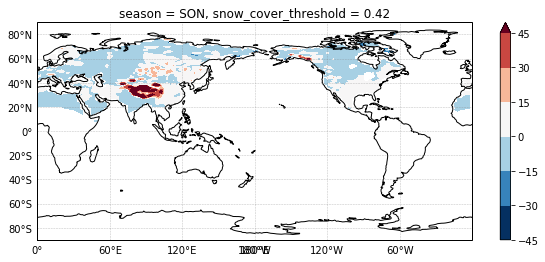

In [5]:
season = "SON"
plt.figure(figsize=(10,4))

ax = plt.axes(projection=ccrs.PlateCarree(180))

season_clim_diff.sel(season=season).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), robust=True)

ax.coastlines()
ax.set_global()

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# plt.savefig('cartopy_diverging_robust_colormap.jpg', dpi=300)

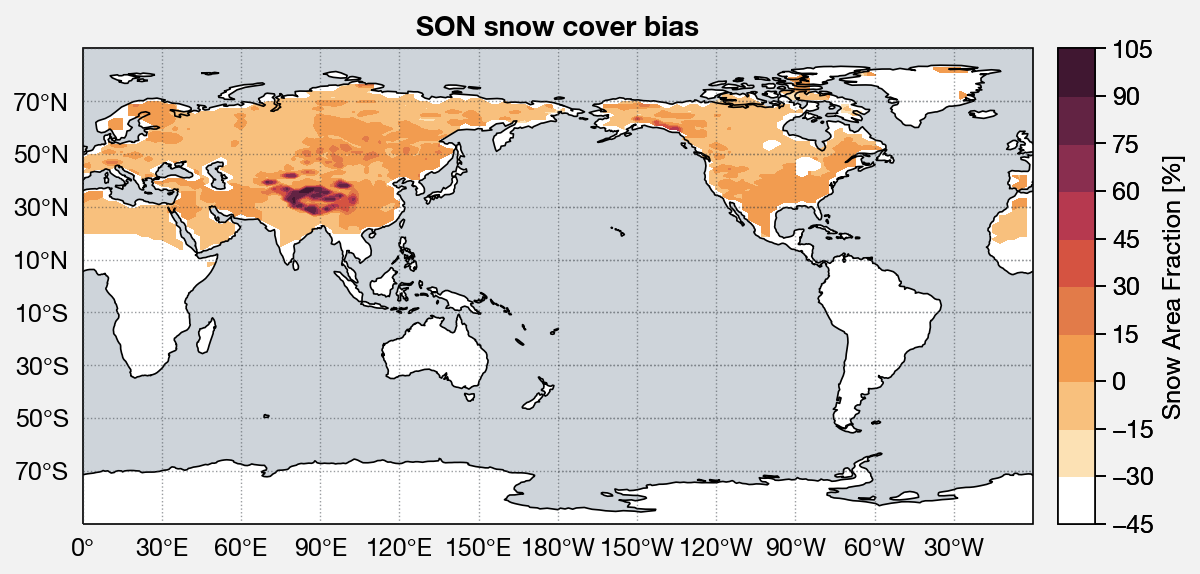

In [6]:
import proplot as plot
season = "SON"
f, axs = plot.subplots(proj='cyl', proj_kw={'lon_0':180}, width=6)

m = axs[0].contourf(season_clim_diff.sel(season=season))

f.colorbar(m, label="Snow Area Fraction [%]")
axs.format(geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
           coast=True, suptitle=season+" snow cover bias", ocean=True, oceancolor='gray4')
# f.save("proplot.jpg")

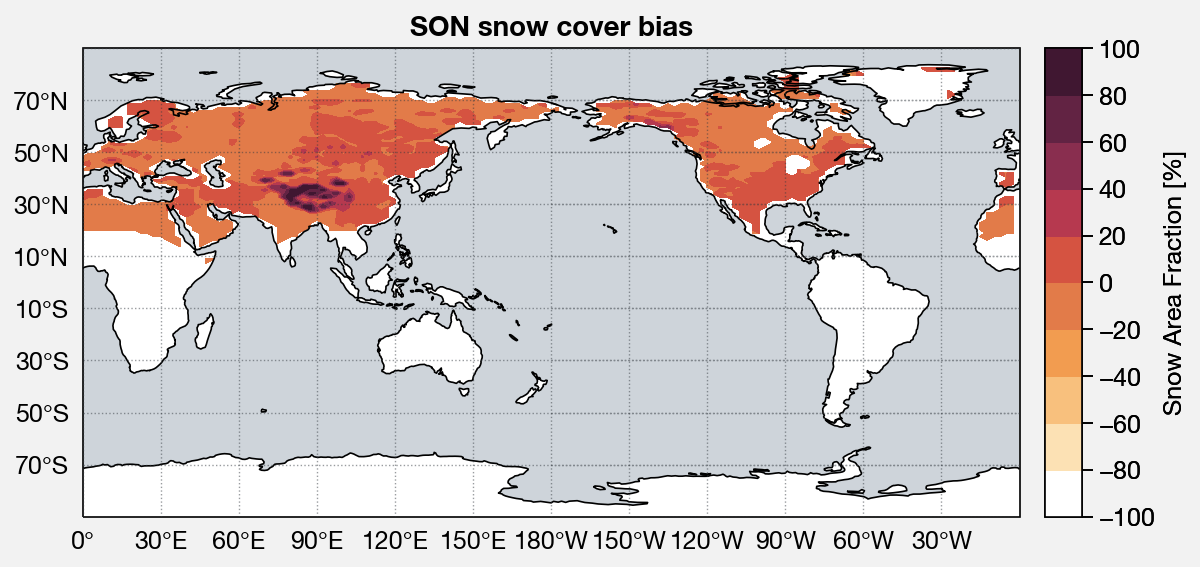

In [7]:
import proplot as plot
season = "SON"
f, axs = plot.subplots(proj='cyl', proj_kw={'lon_0':180}, width=6)

m = axs[0].contourf(season_clim_diff.sel(season=season), symmetric=True)

f.colorbar(m, label="Snow Area Fraction [%]")
axs.format(geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
           coast=True, suptitle=season+" snow cover bias", ocean=True, oceancolor='gray4')
# f.save("proplot_symmetric.jpg")

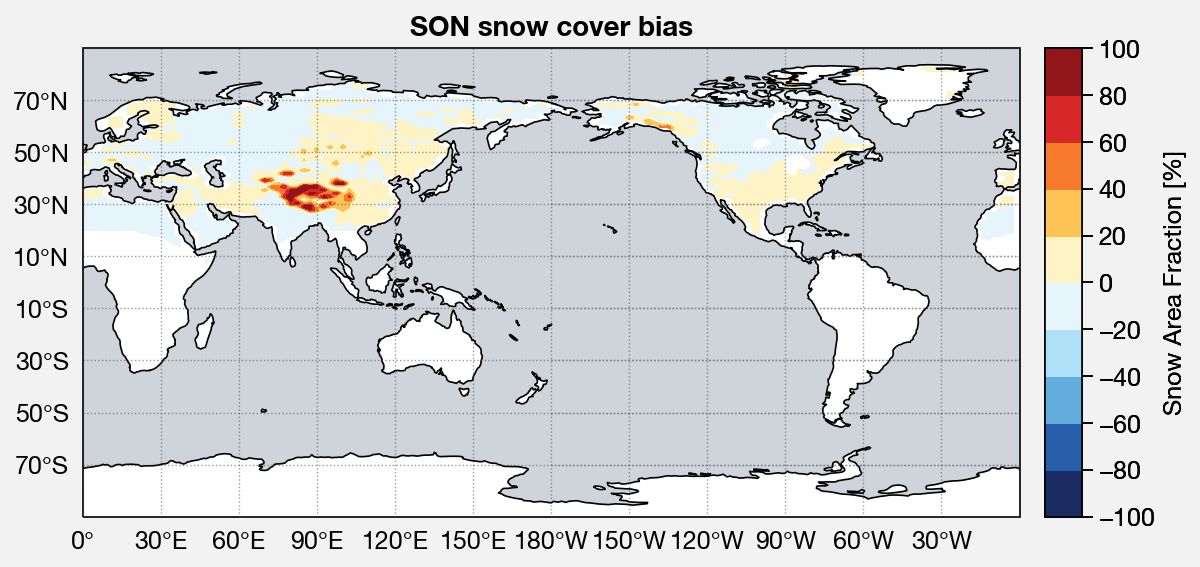

In [8]:
import proplot as plot
season = "SON"
f, axs = plot.subplots(proj='cyl', proj_kw={'lon_0':180}, width=6)
m = axs[0].contourf(season_clim_diff.sel(season=season), cmap='ColdHot', symmetric=True)
f.colorbar(m, label="Snow Area Fraction [%]")
axs.format(geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
           coast=True, suptitle=season+" snow cover bias", ocean=True, oceancolor='gray4')
# f.save("proplot_symmetric_diverging_cmap.jpg")

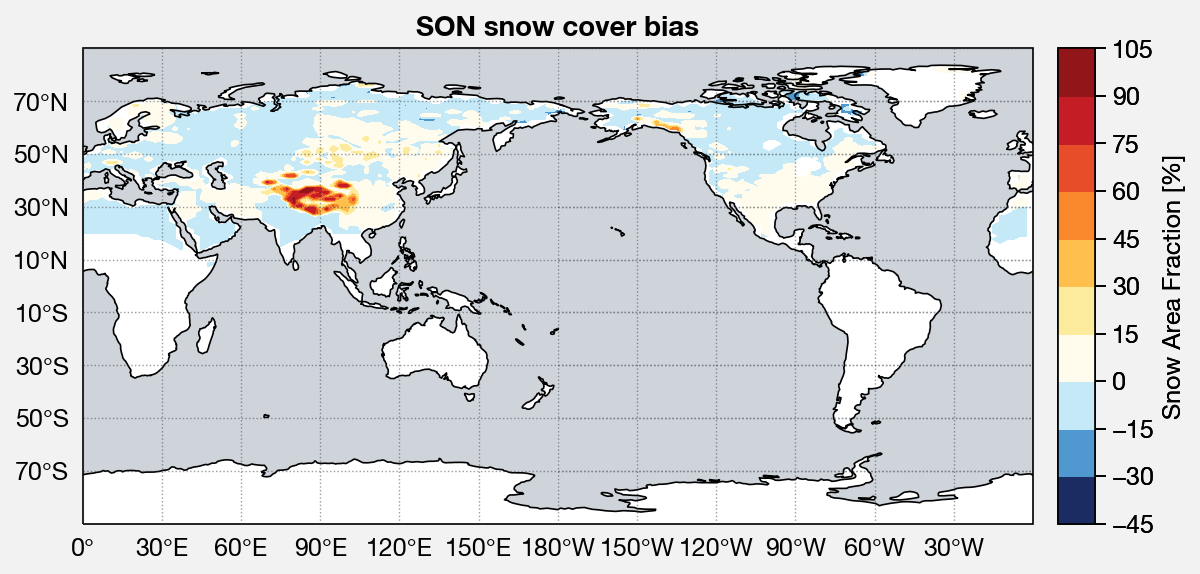

In [9]:
import proplot as plot
season = "SON"
f, axs = plot.subplots(proj='cyl', proj_kw={'lon_0':180}, width=6)
m = axs[0].contourf(season_clim_diff.sel(season=season), cmap='ColdHot', norm='midpoint')
f.colorbar(m, label="Snow Area Fraction [%]")
axs.format(geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
           coast=True, suptitle=season+" snow cover bias", ocean=True, oceancolor='gray4')
# f.save("proplot_norm_diverging_cmap.jpg")

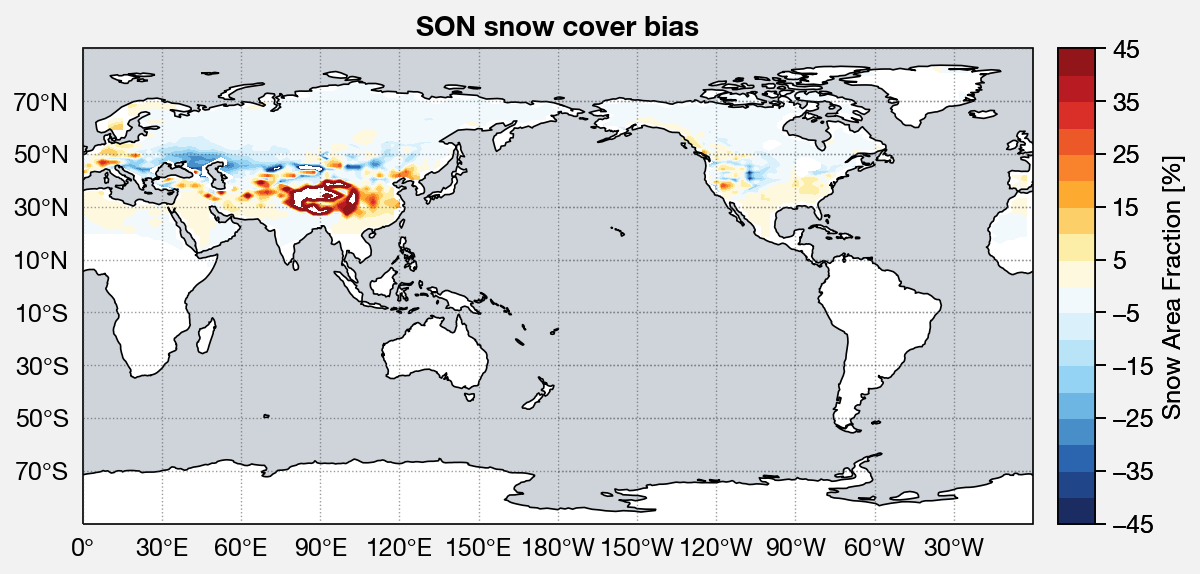

In [10]:
f, axs = plot.subplots(proj='cyl', proj_kw={'lon_0':180}, width=6)
m = axs[0].contourf(season_clim_diff[0], cmap='ColdHot', levels=np.arange(-45,50,5))
f.colorbar(m, label="Snow Area Fraction [%]")
axs.format(geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
           coast=True, suptitle=season+" snow cover bias", ocean=True, oceancolor='gray4')
# f.save("proplot_levels.jpg")

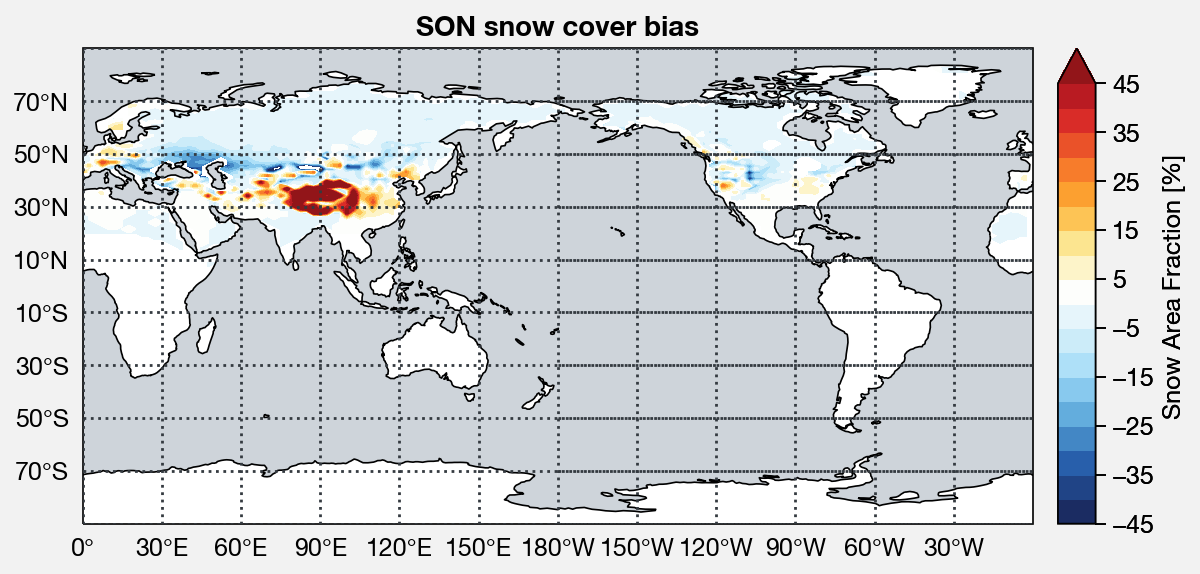

In [11]:
f, axs = plot.subplots(proj='cyl', proj_kw={'lon_0':180}, width=6)
m = axs[0].contourf(season_clim_diff[0], cmap='ColdHot', levels=np.arange(-45,50,5), extend='max', norm='midpoint')
f.colorbar(m, label="Snow Area Fraction [%]")
axs.format(geogridlinewidth=1, geogridcolor='gray8', geogridalpha=1, labels=True, 
           coast=True, suptitle=season+" snow cover bias", ocean=True, oceancolor='gray4')
# f.save("proplot_levels_extend_max.jpg")

# plot.arange()
Btw proplot has a plot.arange(...) function that's great for generating lists of ticks, colorbar levels, etc. Behavior is identical to np.arange except it is endpoint inclusive. So your example would be plot.arange(-45, 45, 5) rather than np.arange(-45, 50, 5) which IMO is more intuitive.

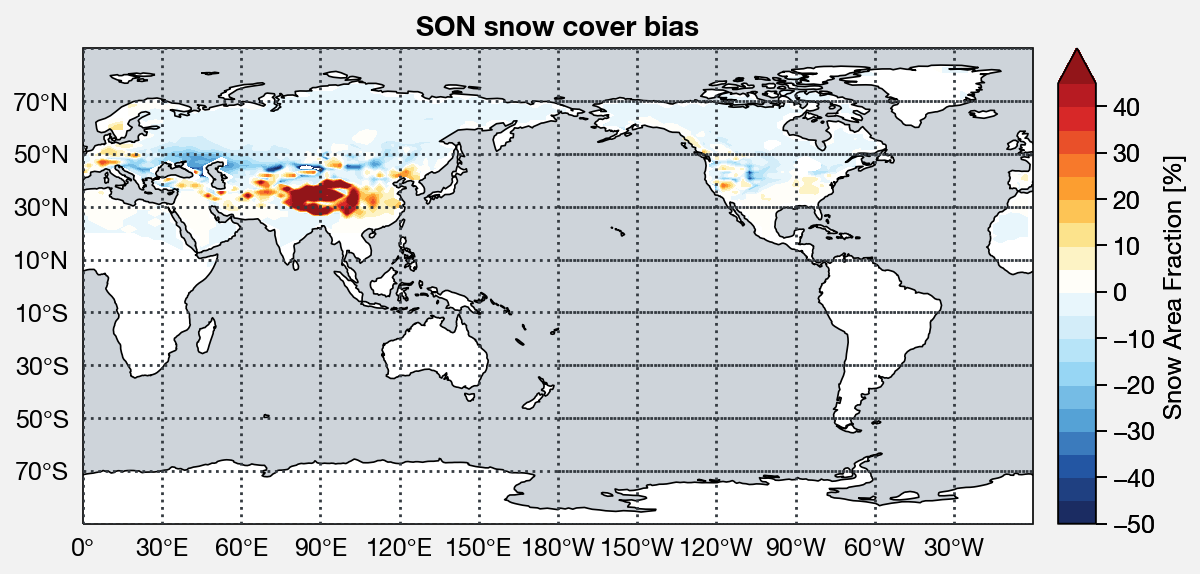

In [13]:
f, axs = plot.subplots(proj='cyl', proj_kw={'lon_0':180}, width=6)
m = axs[0].contourf(season_clim_diff[0], cmap='ColdHot', levels=plot.arange(-50,45,5), extend='max', norm='midpoint')
f.colorbar(m, label="Snow Area Fraction [%]")
axs.format(geogridlinewidth=1, geogridcolor='gray8', geogridalpha=1, labels=True, 
           coast=True, suptitle=season+" snow cover bias", ocean=True, oceancolor='gray4')
# f.save("proplot_levels_extend_max.jpg")